In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df=pd.read_csv("BlackFriday (1).csv")

DATA CLEANING

DATA INFO

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


CHECK DATA

In [56]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


NaN CHANGE TO 0

In [57]:
df=df.fillna(0)

FIND N-UNIQUE AND UNIQUE

In [58]:
for i in df.columns:
  print(i,':',df[i].nunique(),df[i].unique())

User_ID : 5891 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : 3623 ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : 2 ['F' 'M']
Age : 7 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : 21 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : 3 ['A' 'C' 'B']
Stay_In_Current_City_Years : 5 ['2' '4+' '3' '1' '0']
Marital_Status : 2 [0 1]
Product_Category_1 : 18 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Product_Category_2 : 18 [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 : 16 [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase : 17959 [ 8370 15200  1422 ... 14539 11120 18426]


CHECK TYPE

In [59]:
df['Marital_Status'].astype("str")

,Marital_Status
0,0
1,0
2,0
3,0
4,0
...,...
537572,0
537573,0
537574,0
537575,0


Change marital status 0=single and 1=married

In [60]:
df['Marital_Status'] = df['Marital_Status'].astype(str).replace('0','Single').astype(str).replace('1','Married')

Change city category A=Delhi,B=Kolkata,C=Mumbai

In [61]:
df['City_Category']=df['City_Category'].astype(str).replace('A','Kolkata').replace('B','Delhi').replace('C','Mumbai')

Analysis

Columns Describe

In [62]:
for i in df.columns:
  print(i,':',df[i].describe())
  print("-"*40)

User_ID : count    5.375770e+05
mean     1.002992e+06
std      1.714393e+03
min      1.000001e+06
25%      1.001495e+06
50%      1.003031e+06
75%      1.004417e+06
max      1.006040e+06
Name: User_ID, dtype: float64
----------------------------------------
Product_ID : count        537577
unique         3623
top       P00265242
freq           1858
Name: Product_ID, dtype: object
----------------------------------------
Gender : count     537577
unique         2
top            M
freq      405380
Name: Gender, dtype: object
----------------------------------------
Age : count     537577
unique         7
top        26-35
freq      214690
Name: Age, dtype: object
----------------------------------------
Occupation : count    537577.00000
mean          8.08271
std           6.52412
min           0.00000
25%           2.00000
50%           7.00000
75%          14.00000
max          20.00000
Name: Occupation, dtype: float64
----------------------------------------
City_Category : count     53

Length Male, Female

In [63]:
len(df[df['Gender']=='M'])

405380

In [64]:
len(df[df['Gender']=='F'])

132197

In [65]:
df['Gender'].value_counts()

,count
Gender,
M,405380
F,132197


In [66]:
df.groupby('Gender').count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380


<Axes: title={'center': 'Gender Ratio'}>

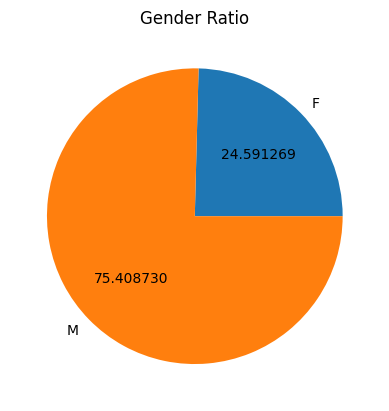

In [67]:
df.groupby('Gender').size().plot(kind='pie',autopct='%2f',title='Gender Ratio')

<Axes: title={'center': 'Gender ratio'}, xlabel='Gender'>

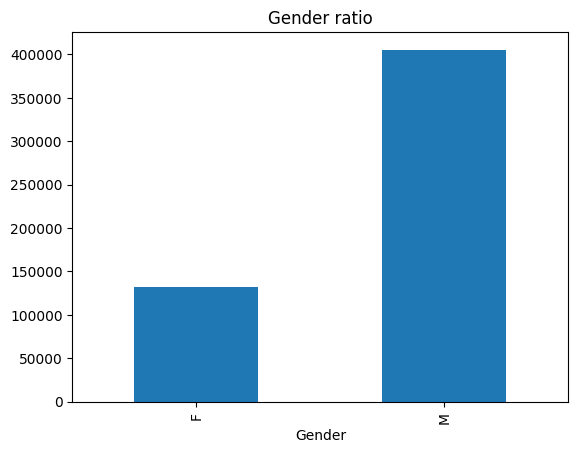

In [68]:
df.groupby('Gender').size().plot(kind='bar',title='Gender ratio')

In [69]:
df.groupby('Gender').sum('Purchase')

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,
F,132605172667,891361,739701,899216.0,459889.0,1164624021
M,406580175483,3453718,2107063,2748194.0,1621487.0,3853044357


<Axes: ylabel='Purchase'>

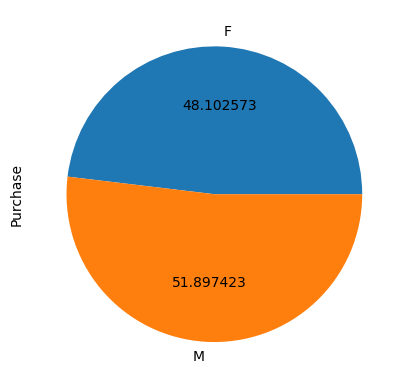

In [70]:
df.groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind='pie',autopct='%2f')

In [71]:
df.groupby('Age').size()

,0
Age,
0-17,14707
18-25,97634
26-35,214690
36-45,107499
46-50,44526
51-55,37618
55+,20903


<Axes: xlabel='Age'>

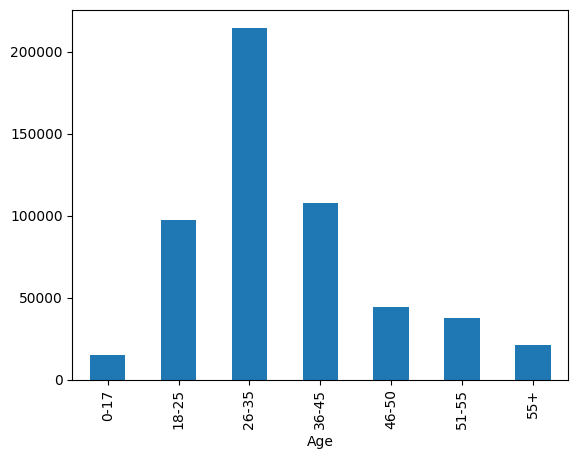

In [72]:
df.groupby('Age').size().plot(kind='bar')

In [73]:
df['Product_ID'].nunique()

3623

In [74]:
df.groupby('Age')['Product_ID'].sum()

,Product_ID
Age,
0-17,P00069042P00248942P00087842P00085442P00112542P...
18-25,P00366542P00190742P00151842P00112642P00118442P...
26-35,P00193542P00274942P00251242P00014542P00031342P...
36-45,P00036842P00085942P00118742P00297942P00266842P...
46-50,P00184942P00346142P0097242P00129542P00140742P0...
51-55,P00231342P00190242P0096642P00058442P00019342P0...
55+,P00285442P00117442P00322042P00216342P00329342P...


In [75]:
for i in df['Age'].unique():
  print(i,':',len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


<Axes: xlabel='Age'>

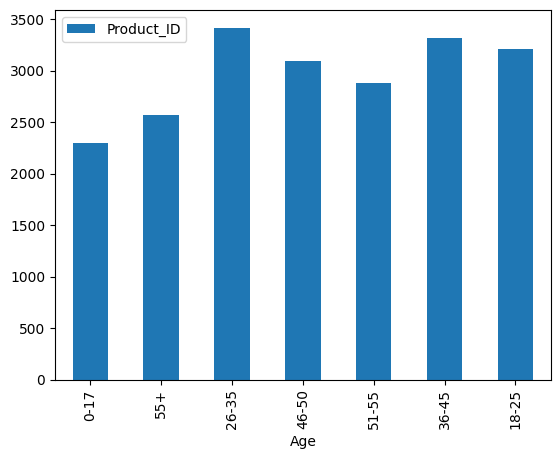

In [76]:
lst=[]
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst,columns=['Age','Product_ID'])
data.plot(kind='bar',x='Age',y='Product_ID')

<Axes: xlabel='Age'>

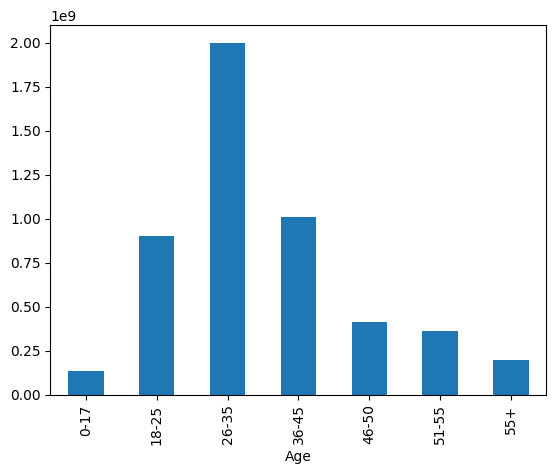

In [77]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar')

<Axes: ylabel='Purchase'>

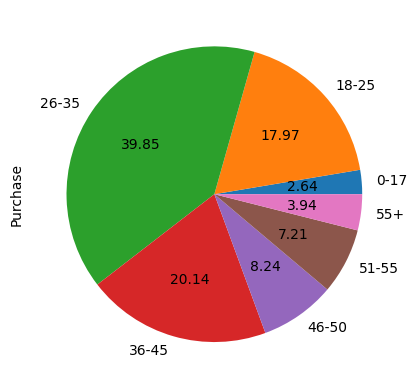

In [78]:
df.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Age'>

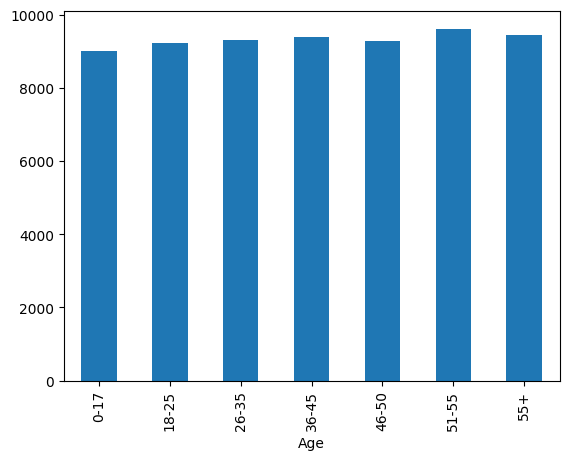

In [79]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind='bar')

<Axes: xlabel='Age', ylabel='count'>

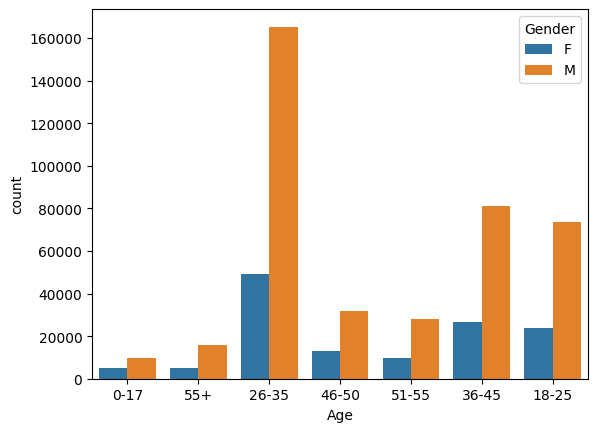

In [80]:
sns.countplot(x='Age',data=df,hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

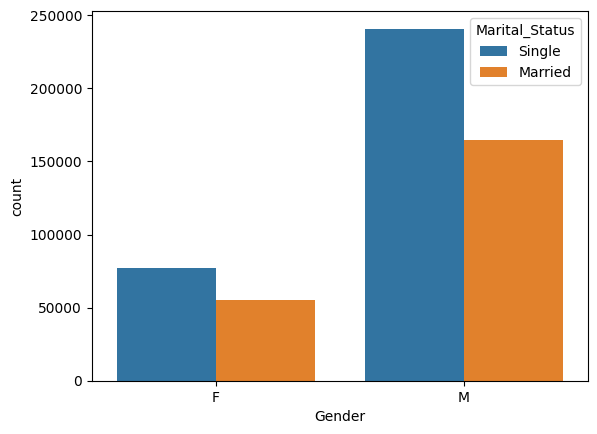

In [81]:
sns.countplot(x='Gender',data=df,hue='Marital_Status')

<Axes: xlabel='City_Category'>

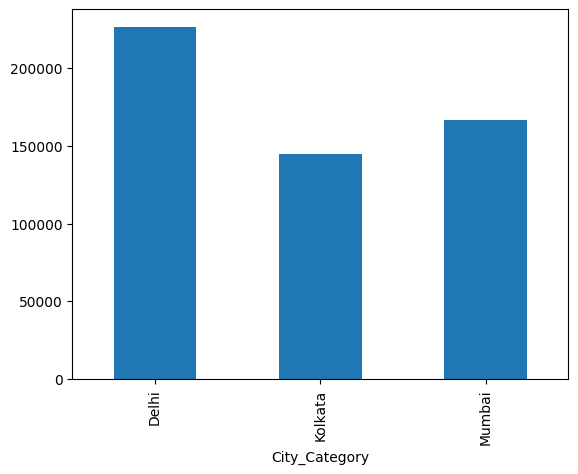

In [82]:
df.groupby('City_Category').size().plot(kind='bar')

<Axes: >

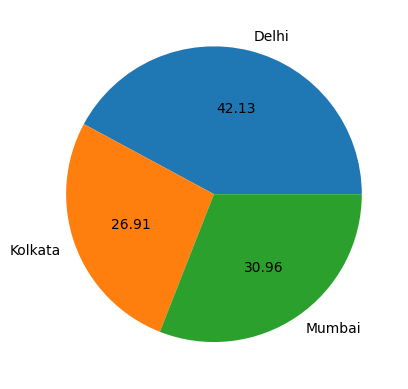

In [83]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='City_Category', ylabel='count'>

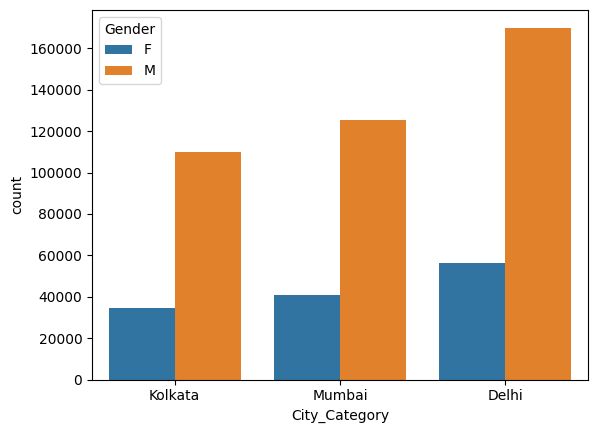

In [87]:
sns.countplot(x='City_Category',data=df,hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

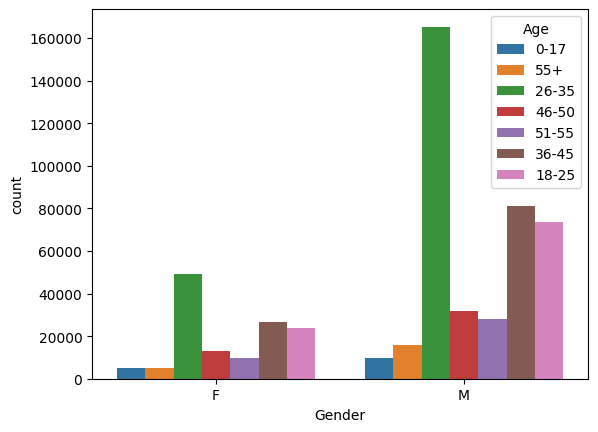

In [86]:
sns.countplot(x='Gender',data=df,hue='Age')